In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

msg=pd.read_csv('https://raw.githubusercontent.com/AbhishekMali21/VTU-CSE-LAB-SOLUTIONS/master/7th%20SEM/MACHINE%20LEARNING%20LABORATORY/6-Naive%20Bayesian%20Classifier(using%20API)/document.csv',names=['message','label'])

print('The dimensions of the dataset',msg.shape)

The dimensions of the dataset (18, 2)


In [9]:
msg['labelnum']=msg.label.map({'pos':1,'neg':0})
X=msg.message
y=msg.labelnum

In [10]:
#splitting the dataset into train and test data
xtrain,xtest,ytrain,ytest=train_test_split(X,y)
print ('\n the total number of Training Data :',ytrain.shape)
print ('\n the total number of Test Data :',ytest.shape)


 the total number of Training Data : (13,)

 the total number of Test Data : (5,)


In [11]:
#output the words or Tokens in the text documents
cv = CountVectorizer()
xtrain_dtm = cv.fit_transform(xtrain)
xtest_dtm=cv.transform(xtest)
print('\n The words or Tokens in the text documents \n')
print(cv.get_feature_names())
df=pd.DataFrame(xtrain_dtm.toarray(),columns=cv.get_feature_names())


 The words or Tokens in the text documents 

['about', 'am', 'amazing', 'an', 'and', 'bad', 'beers', 'best', 'boss', 'can', 'deal', 'do', 'enemy', 'feel', 'fun', 'good', 'great', 'have', 'he', 'holiday', 'horrible', 'house', 'is', 'like', 'locality', 'love', 'my', 'not', 'of', 'place', 'restaurant', 'sandwich', 'sick', 'stay', 'sworn', 'that', 'these', 'this', 'tired', 'to', 'today', 'tomorrow', 'very', 'we', 'went', 'what', 'will', 'with', 'work']


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [12]:
# Training Naive Bayes (NB) classifier on training data.
clf = MultinomialNB().fit(xtrain_dtm,ytrain)
predicted = clf.predict(xtest_dtm)

In [13]:
#printing accuracy, Confusion matrix, Precision and Recall
print('\n Accuracy of the classifier is',metrics.accuracy_score(ytest,predicted))
print('\n Confusion matrix')
print(metrics.confusion_matrix(ytest,predicted))
print('\n The value of Precision', metrics.precision_score(ytest,predicted))
print('\n The value of Recall', metrics.recall_score(ytest,predicted))


 Accuracy of the classifier is 0.8

 Confusion matrix
[[2 0]
 [1 2]]

 The value of Precision 1.0

 The value of Recall 0.6666666666666666


(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([0.16666667, 0.26666667, 0.36666667, 0.46666667, 0.56666667,
        0.66666667, 0.76666667, 0.86666667, 0.96666667, 1.06666667,
        1.16666667]),
 <BarContainer object of 10 artists>)

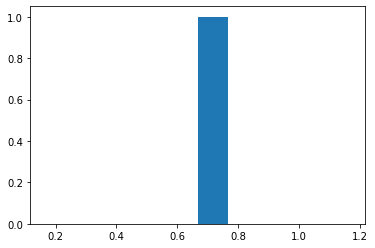

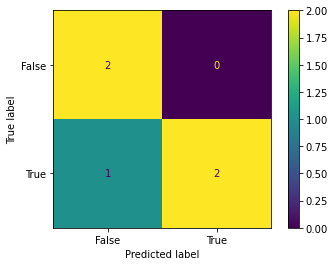

In [30]:
import matplotlib.pyplot as plt
confusion_matrix = metrics.confusion_matrix(ytest, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

ValueError: could not convert string to float: 'He is my sworn enemy'